<a href="https://colab.research.google.com/github/RodolfoRaffaele/RodolfoRaffaele/blob/main/PROJETO_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
!pip install pyzipcode
%pip install sidetable

import numpy as np
import sidetable
from scipy import stats


import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyzipcode import ZipCodeDatabase
zcbd = ZipCodeDatabase()

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#Verificando NaN
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
city             198
dtype: int64

In [ ]:
#Verificando duplicatas
df.duplicated().sum()

0

In [ ]:
cities = []
for zipcode in df['zipcode']:
  try:
    zc = zcbd[zipcode]
    cities.append(zc.city)
  except KeyError:
    cities.append(float('nan'))
df['city'] = cities
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [ ]:
#Escolher quais itens serão escolhidos para definir piores e melhores imóveis
#Id - Identificação
# Price
# Bedrooms
# Bathrooms
# sqft_lot
# condition
# view 
# city

df = df.drop(['date', 'sqft_living', 'floors','waterfront','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long', 'sqft_living15','sqft_lot15','yr_renovated'], axis=1)

In [ ]:
df

,id,price,bedrooms,bathrooms,sqft_lot,view,condition,city
0,7129300520,221900.0,3,1.00,5650,0,3,Seattle
1,6414100192,538000.0,3,2.25,7242,0,3,Seattle
2,5631500400,180000.0,2,1.00,10000,0,3,Kenmore
3,2487200875,604000.0,4,3.00,5000,0,5,Seattle
4,1954400510,510000.0,3,2.00,8080,0,3,Sammamish
...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1131,0,3,Seattle
21609,6600060120,400000.0,4,2.50,5813,0,3,Seattle
21610,1523300141,402101.0,2,0.75,1350,0,3,Seattle
21611,291310100,400000.0,3,2.50,2388,0,3,Issaquah


In [ ]:
piores = df


In [ ]:
# Fazer um filtro por quarto, banheiro, vista e condição dos imóveis
df = df.loc[((df['bedrooms']>= 3))]
df = df.loc[((df['bathrooms']>= 2.5))]
df = df.loc[((df['condition']>= 4))]
df = df.loc[((df['view']>= 3))]
df

,id,price,bedrooms,bathrooms,sqft_lot,view,condition,city
58,7922800400,951000.0,5,3.25,14342,4,4,Bellevue
312,1860600135,2384000.0,5,2.50,9050,4,5,Seattle
409,1560930070,840000.0,4,3.50,40139,4,4,Maple Valley
457,2122039094,705000.0,3,3.00,20978,3,4,Vashon
540,622049114,2125000.0,3,2.50,24069,4,4,Seattle
...,...,...,...,...,...,...,...,...
18828,1455100355,1675000.0,3,2.50,8343,4,4,Seattle
18912,2425049066,1920000.0,4,2.50,34412,3,4,Medina
19068,6613001241,1415000.0,4,3.00,4408,3,4,Seattle
19215,4131900042,2000000.0,5,4.25,10862,3,4,Mercer Island


In [ ]:
#Definir o preço médio dos imóveis em cada cidade
df2=df
df2 = df.groupby('city')['price'].mean().round()
df2

city
Auburn            413667.0
Bellevue         1405570.0
Enumclaw          450000.0
Federal Way       546000.0
Kenmore           805000.0
Kent              697500.0
Kirkland         1694050.0
Maple Valley      840000.0
Medina           2780450.0
Mercer Island    2357357.0
Redmond          1950000.0
Renton            589950.0
Sammamish        1690578.0
Seattle          1428630.0
Vashon            714000.0
Name: price, dtype: float64

In [ ]:
# Quantidade de imóveis em cada cidade
n_city = df['city'].value_counts()
n_city

Seattle          103
Bellevue          45
Mercer Island     15
Kirkland          10
Vashon             5
Sammamish          5
Federal Way        4
Auburn             3
Redmond            2
Kent               2
Kenmore            2
Enumclaw           2
Medina             2
Maple Valley       1
Renton             1
Name: city, dtype: int64

In [ ]:
# Definindo as cidades de Seattle como a cidade com maior número de imóveis em negociação.


df_Seattle = df.loc[df['city'] == 'Seattle']
df_Seattle


,id,price,bedrooms,bathrooms,sqft_lot,view,condition,city
312,1860600135,2384000.0,5,2.50,9050,4,5,Seattle
540,622049114,2125000.0,3,2.50,24069,4,4,Seattle
551,1373800295,1450000.0,3,3.00,6320,3,5,Seattle
1031,5700004028,2450000.0,4,4.25,6552,3,4,Seattle
1062,3524039204,790000.0,4,2.75,11900,3,4,Seattle
...,...,...,...,...,...,...,...,...
18768,1959701800,2147500.0,3,3.50,5500,4,5,Seattle
18775,6909700040,813000.0,4,2.75,6675,3,4,Seattle
18828,1455100355,1675000.0,3,2.50,8343,4,4,Seattle
19068,6613001241,1415000.0,4,3.00,4408,3,4,Seattle


In [ ]:
# Com base nas informações retiradas de www.census.gov., foi identificado que Seattle possui aproximadamente 769.000 pessoas
# com renda per capita de U$ 65.000.
# O condado de King County possui 2,3 milhões de pessoa com uma renda per capita de U$ 50.000.

df_sorted0a =df_Seattle.sort_values('price')
df_top = df_sorted0a.head(20)
print(df_top)

               id     price  bedrooms  bathrooms  sqft_lot  view  condition  \
4429   2011400583  402000.0         3       2.50      9994     3          4   
4576   7203600750  421000.0         3       2.50      4505     3          4   
1271   7893804340  470000.0         4       2.50      8062     3          4   
1755   7784400060  545000.0         3       2.50      9000     3          4   
11110  8859000045  545000.0         4       2.75      8480     3          4   
8791   5067400032  550000.0         3       2.50     14400     3          5   
7412   7130300170  552000.0         4       2.75      8429     3          4   
18079  2769600035  612000.0         4       2.50      3626     3          4   
9101   7129301001  675000.0         4       2.75      6780     3          5   
18097  1455600062  689000.0         3       2.50      9612     3          4   
6023   6641800020  700000.0         4       2.50      9650     3          4   
10772  7774200070  725000.0         4       2.50    

In [ ]:
# Distribuição de preço dos imóveis selecionados na cidade de Seatlle

px.box(df_Seattle, x='price', width = 500, height = 400)


In [ ]:

px.box(df_top, x='price',width = 500, height = 400)

<AxesSubplot:xlabel='price', ylabel='condition'>

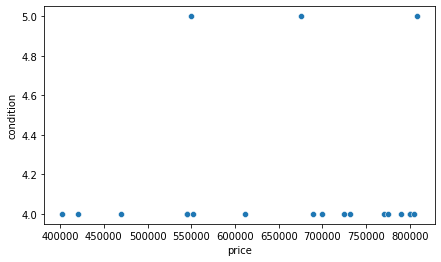

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_top, x='price', y='condition')

<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

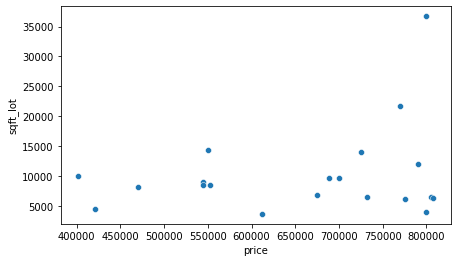

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_top, x='price', y='sqft_lot')

In [ ]:
piores

,id,price,bedrooms,bathrooms,sqft_lot,view,condition,city
0,7129300520,221900.0,3,1.00,5650,0,3,Seattle
1,6414100192,538000.0,3,2.25,7242,0,3,Seattle
2,5631500400,180000.0,2,1.00,10000,0,3,Kenmore
3,2487200875,604000.0,4,3.00,5000,0,5,Seattle
4,1954400510,510000.0,3,2.00,8080,0,3,Sammamish
...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1131,0,3,Seattle
21609,6600060120,400000.0,4,2.50,5813,0,3,Seattle
21610,1523300141,402101.0,2,0.75,1350,0,3,Seattle
21611,291310100,400000.0,3,2.50,2388,0,3,Issaquah


In [ ]:
piores = piores.loc[((df['city']!='Seattle'))]
piores = piores.loc[((df['bedrooms']< 3))]
piores = piores.loc[((df['bathrooms']< 2.5))]
piores = piores.loc[((df['condition']< 4))]
piores = piores.loc[((df['view']< 3))]
piores = piores.loc[((df['price']> 990000))]
piores

,id,price,bedrooms,bathrooms,sqft_lot,view,condition,city
2596,8056000075,1065000.0,2,1.75,9466,0,3,Bellevue
5742,1224049005,1087500.0,2,2.00,11340,0,3,Mercer Island
6994,2954400190,1295650.0,0,0.00,28008,0,3,Redmond
10842,1526059051,995000.0,2,2.00,64468,0,3,Woodinville
21548,8835770330,1057000.0,2,1.50,184231,0,3,North Bend
